In [9]:
from ipywidgets import *
import plotly.graph_objects as go
import numpy as np
import random as r
import matplotlib.pyplot as plt
import scipy.signal as s
from math import sin, cos, exp, sqrt, cosh, log, pi
import math 
from IPython.display import clear_output

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

SEED = r.randrange(1, 100)

def eval_P(X):
    return np.trapz(X**2)



checkbox = widgets.Checkbox(
    value=False,
    description='set seed',
    disabled=False,
    indent=False,
    layout=Layout(width='100px',margin='0 0 0 30px')
)

slider = widgets.IntSlider(
    value=0,
    min=0,
    max=1,
    step=1,
)


seed_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=10,
    step=1,
    description='seed:',
    layout=Layout(width='300px')
)

slider_value1=  widgets.FloatSlider(value=1,min=-10000,max=100000,step=0.0000000000000000001)
slider_value2=  widgets.FloatSlider(value=1,min=-10000,max=100000,step=0.0000000000000000001)
slider_value3=  widgets.FloatSlider(value=1,min=-10000,max=100000,step=0.0000000000000000001)
slider_value4=  widgets.FloatSlider(value=1,min=-10000,max=100000,step=0.0000000000000000001)
slider_value5=  widgets.FloatSlider(value=1,min=-10000,max=100000,step=0.0000000000000000001)


fig1 = go.Figure( layout=go.Layout(
       font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"),width=580, height=580,margin=dict(l=0, r=0, t=0, b=0) ,
    legend=dict(x=0, y=1)))

fig2 = go.Figure( layout=go.Layout(
       font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"),width=580, height=580,margin=dict(l=0, r=0, t=0, b=0) ,
    legend=dict(x=0, y=1)))


In [31]:

def BFG1():
    w_min = 1000
    w_max = 10000
    t0 = 0
    t1 = 1
    h = 0.01
    freq = lambda t: w_min+alpha*t
    t_len = int((t1-t0)/h)
    alpha = (w_max-w_min)/t_len
    T=np.linspace(t0,t1,t_len)
    x = np.asarray([cos(t*freq(t)) for t in T])# добавить нули
    x_new = np.hstack((x, np.zeros(20*t_len)))
    y = np.fft.fft(x_new)
    
    XX=[]
    for i in range(0,len(y)):
        XX.append(i)
        
    return [[XX,np.abs(y)]]

def BFG2():
    result = BFG1()
    y = result[0][1]
    
    y_1 = y[:int(len(y)/2)]
    
    return [[ result[0][0], abs(y_1) ]]

def css_widget(text, font_size=10):
    html = "<h1 style='font-size:"+str(font_size)+"px; margin-left: 50px; margin-top: 0;margin-bottom:0;width:350px'>" + str(text) + "</h1>"
    W = widgets.HTML(value=html)
    return W



In [34]:

step_btn = widgets.Button(description='refresh', button_style='primary')

def custom_layout(w,h):

    ll=Layout(width=str(w) + 'px', height=str(h) + 'px', border='solid')

    return ll 


def showText(text):
    print("\t", text)





def function(widget, figure, fun_for_data):
    
    global SEED
    
    figure.data = []   
    
    if(checkbox.value == True):
        np.random.seed(seed_slider.value)
    else:
        np.random.seed(SEED)
    
    data = fun_for_data() 
 
    for values in data:
        figure.add_trace(go.Scatter(x=values[0], y=values[1]))
        
        

        


    figure.show()


def custom_display():
    
    text=""" На цифровой сигнал подается БГШ (белый гаусс. шум). Пропускаем через фильтр Баттерворта. Рассчитать отношения мощностей до и после фильтрации.
    В работе используются два фильтра: фильтр Баттерворта и встроенный в пакет scipy.signal lowess """
    
    
    ui = HBox([step_btn, checkbox, seed_slider], layout=Layout(margin='0 0 0 33px'))
    HH_ui1 = VBox([ui,interactive_plot1])
    HH_ui2 = VBox([ui,interactive_plot2])
    
    
    tab = widgets.Tab(children = [HH_ui1, HH_ui2 ])
    tab.set_title(0, '3.1')
    tab.set_title(1, '3.2')
    
    
    
    
    #text_for_slider1= "ОТНОШЕНИЕ ЧИСТОГО К БАТТЕР"
    #text_for_slider2= "ОТНОШЕНИЕ ЧИСТОГО К LOWESS"
    #text_for_slider3= "ОТНОШЕНИЕ ЧИСТОГО К ШУМУ"

    
    #slider_value1.value = A
    #slider_value2.value = B   
    #slider_value3.value = C
    #slider_value4.value = D
    #slider_value5.value = E

    
    
    #out1 = widgets.interactive_output(showText, {'text':slider_value1 })
    #out2 = widgets.interactive_output(showText, {'text':slider_value2 })
    #out3 = widgets.interactive_output(showText, {'text':slider_value3 })
    #out4 = widgets.interactive_output(showText, {'text':slider_value4 })
    #out5 = widgets.interactive_output(showText, {'text':slider_value5 })
    
    
    HHH_2 = (Box([tab], layout = custom_layout(700,700)))
    
    
    
#     Htext = VBox([css_widget("Задача 1",15),
#                   css_widget(text,12),
#                   css_widget(text_for_slider1,12),
                  
#                   out3,
#                   css_widget(text_for_slider2,12),
#                   out4,
                  
#                   css_widget(text_for_slider3,12),
#                   out5])
    
    
    HHH_3 = (Box([], layout = custom_layout(500,700)))
    
    item_2 = HBox([HHH_2,HHH_3])

    display(VBox([item_2]))
    
    toggle_visibility(None)


def toggle_visibility(button):
    seed_slider.layout.visibility = 'hidden' if (checkbox.value == False) else  'visible'


def clicker(b):
    global SEED
    SEED = r.randrange(1, 100)
    slider.value = 1 if (slider.value == 0) else  0  
    custom_display()
       
step_btn.on_click(clicker)
checkbox.observe(toggle_visibility)

interactive_plot1 = interactive_output(function, {'widget':slider, 'figure':fixed(fig1), 'fun_for_data': fixed(BFG1) })
interactive_plot2 = interactive_output(function, {'widget':slider, 'figure':fixed(fig1), 'fun_for_data': fixed(BFG2) })

custom_display()

2100


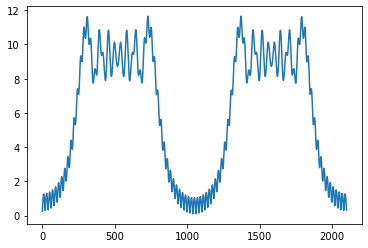

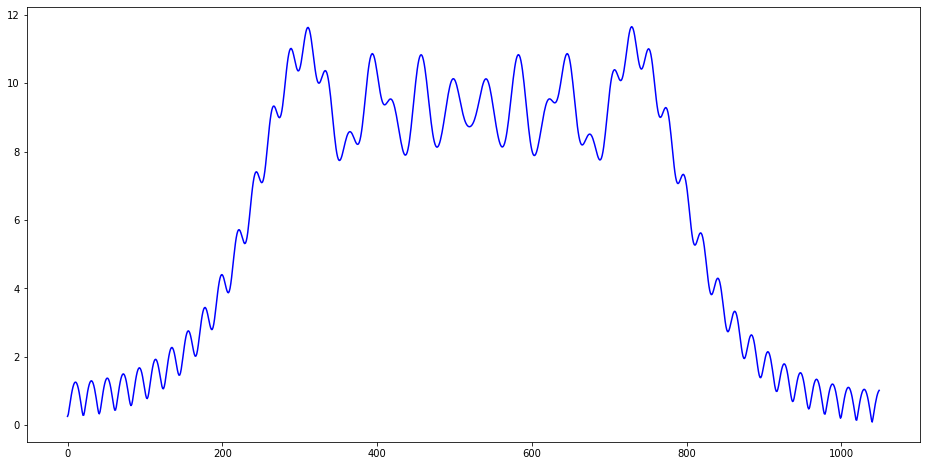

In [7]:

mega = lambda t, w_min, alpha : w_min + alpha * t
X = lambda t, w_min, alpha, phi=0 : np.cos(Omega(t, w_min, alpha) * t + phi)

w_min = 1000
w_max = 10000
t0 = 0
t1 = 1
h = 0.01
freq = lambda t: w_min+alpha*t
t_len = int((t1-t0)/h)
alpha = (w_max-w_min)/t_len
T=np.linspace(t0,t1,t_len)
x = np.asarray([cos(t*freq(t)) for t in T])# добавить нули
x_new = np.hstack((x, np.zeros(20*t_len)))
y = np.fft.fft(x_new)
plt.plot(np.abs(y))
y_1 = y[:int(len(y)/2)]
fig = plt.figure(figsize=(16,8))
plt.plot(abs(y_1), color = 'blue')
print(len(y))